In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

from collections import Counter

from wordcloud import WordCloud

import re

In [2]:
nltk.download('punkt') 
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
file_path = './Womens Clothing E-Commerce Reviews.csv'
data_df = pd.read_csv(file_path, index_col = 0)

In [4]:
print(data_df.shape)
data_df.head(3)

(23486, 10)


,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses


## 1. Data Cleaning

##### - Check Null Value in 'Review Text' column

In [5]:
data_df['Review Text'].isnull().sum()

845

##### - Check null value in 'Recommended IND' column

In [6]:
data_df['Recommended IND'].isnull().sum()

0

##### - Drop row with null value of the columns

In [7]:
data_df.dropna(subset=['Review Text', 'Recommended IND'], inplace=True)

In [8]:
data_df['Review Text'].isnull().sum()

0

In [9]:
data_df['Recommended IND'].isnull().sum()

0

##### - Convert title and review texts to lower case

In [10]:
data_df['Review Text'] = data_df['Review Text'].str.lower()
data_df['Title'] = data_df['Title'].str.lower()

In [11]:
data_df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,some major design flaws,i had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,my favorite buy!,"i love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,flattering shirt,this shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


##### - Replace null value within the title column to empty string 

In [12]:
data_df['Title'].fillna(' ', inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_13196\1348187264.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_df['Title'].fillna(' ', inplace=True)


In [13]:
data_df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,,absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,,love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,some major design flaws,i had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,my favorite buy!,"i love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,flattering shirt,this shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


## 2. Data Transformation 

In [14]:
insert_index = data_df.columns.get_loc('Review Text') + 1

data_df.insert(insert_index, 'Combined Text', data_df['Title'] + ' ' + data_df['Review Text'])

In [15]:
data_df.head()

,Clothing ID,Age,Title,Review Text,Combined Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,,absolutely wonderful - silky and sexy and comf...,absolutely wonderful - silky and sexy and co...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,,love this dress! it's sooo pretty. i happene...,love this dress! it's sooo pretty. i happe...,5,1,4,General,Dresses,Dresses
2,1077,60,some major design flaws,i had such high hopes for this dress and reall...,some major design flaws i had such high hopes ...,3,0,0,General,Dresses,Dresses
3,1049,50,my favorite buy!,"i love, love, love this jumpsuit. it's fun, fl...","my favorite buy! i love, love, love this jumps...",5,1,0,General Petite,Bottoms,Pants
4,847,47,flattering shirt,this shirt is very flattering to all due to th...,flattering shirt this shirt is very flattering...,5,1,6,General,Tops,Blouses


## 3. Text Preprocessing

##### - Tokenize text

In [16]:
def tokenize_text_with_re(text):
    
    #This pattern focuses on capturing words and specific patterns 
    # while excluding most standard punctuation marks like commas, exclamation marks, etc. 
    contraction_pattern = r"\b\w+(?:[-']\w+|\w+'\w+|\w+'\d+)?"

    tokens = re.findall(contraction_pattern, text)
    
    return tokens

# test
tokenize_text_with_re(data_df['Review Text'][1])

['love',
 'this',
 'dress',
 "it's",
 'sooo',
 'pretty',
 'i',
 'happened',
 'to',
 'find',
 'it',
 'in',
 'a',
 'store',
 'and',
 "i'm",
 'glad',
 'i',
 'did',
 'bc',
 'i',
 'never',
 'would',
 'have',
 'ordered',
 'it',
 'online',
 'bc',
 "it's",
 'petite',
 'i',
 'bought',
 'a',
 'petite',
 'and',
 'am',
 "5'8",
 'i',
 'love',
 'the',
 'length',
 'on',
 'me',
 'hits',
 'just',
 'a',
 'little',
 'below',
 'the',
 'knee',
 'would',
 'definitely',
 'be',
 'a',
 'true',
 'midi',
 'on',
 'someone',
 'who',
 'is',
 'truly',
 'petite']

##### - Create a new column storing tokenized text list

In [17]:
insert_index = data_df.columns.get_loc('Combined Text') + 1

data_df.insert(insert_index, 'Tokenized Text', data_df['Combined Text'].apply(tokenize_text_with_re))

In [18]:
data_df.head(3)

,Clothing ID,Age,Title,Review Text,Combined Text,Tokenized Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,,absolutely wonderful - silky and sexy and comf...,absolutely wonderful - silky and sexy and co...,"[absolutely, wonderful, silky, and, sexy, and,...",4,1,0,Initmates,Intimate,Intimates
1,1080,34,,love this dress! it's sooo pretty. i happene...,love this dress! it's sooo pretty. i happe...,"[love, this, dress, it's, sooo, pretty, i, hap...",5,1,4,General,Dresses,Dresses
2,1077,60,some major design flaws,i had such high hopes for this dress and reall...,some major design flaws i had such high hopes ...,"[some, major, design, flaws, i, had, such, hig...",3,0,0,General,Dresses,Dresses


##### - Removing stop words

In [19]:
stop_words = set(stopwords.words('english'))

In [20]:
def remove_stop_words(tokens_list):
    removed_sw_list = []
    
    for token in tokens_list:
        if token in stop_words:
            continue
        
        removed_sw_list.append(token)
        
    return removed_sw_list

In [21]:
data_df['Tokenized Text'] = data_df['Tokenized Text'].apply(remove_stop_words)

In [22]:
data_df.head(3)

,Clothing ID,Age,Title,Review Text,Combined Text,Tokenized Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,,absolutely wonderful - silky and sexy and comf...,absolutely wonderful - silky and sexy and co...,"[absolutely, wonderful, silky, sexy, comfortable]",4,1,0,Initmates,Intimate,Intimates
1,1080,34,,love this dress! it's sooo pretty. i happene...,love this dress! it's sooo pretty. i happe...,"[love, dress, sooo, pretty, happened, find, st...",5,1,4,General,Dresses,Dresses
2,1077,60,some major design flaws,i had such high hopes for this dress and reall...,some major design flaws i had such high hopes ...,"[major, design, flaws, high, hopes, dress, rea...",3,0,0,General,Dresses,Dresses


##### - Stemming

In [23]:
stemmer = PorterStemmer()

def text_stemming(text_tokens):
    
    return [stemmer.stem(token) for token in text_tokens]


In [24]:
data_df['Tokenized Text'] = data_df['Tokenized Text'].apply(text_stemming)

In [25]:
data_df.head(3)

,Clothing ID,Age,Title,Review Text,Combined Text,Tokenized Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,,absolutely wonderful - silky and sexy and comf...,absolutely wonderful - silky and sexy and co...,"[absolut, wonder, silki, sexi, comfort]",4,1,0,Initmates,Intimate,Intimates
1,1080,34,,love this dress! it's sooo pretty. i happene...,love this dress! it's sooo pretty. i happe...,"[love, dress, sooo, pretti, happen, find, stor...",5,1,4,General,Dresses,Dresses
2,1077,60,some major design flaws,i had such high hopes for this dress and reall...,some major design flaws i had such high hopes ...,"[major, design, flaw, high, hope, dress, reall...",3,0,0,General,Dresses,Dresses


## 4. Pre-Feature Selection

In [26]:
columns_to_drop = ['Clothing ID','Age','Title','Review Text','Positive Feedback Count','Division Name','Department Name','Class Name']

data_df_pfs = data_df.drop(columns=columns_to_drop)

In [27]:
data_df_pfs.head(3)

,Combined Text,Tokenized Text,Rating,Recommended IND
0,absolutely wonderful - silky and sexy and co...,"[absolut, wonder, silki, sexi, comfort]",4,1
1,love this dress! it's sooo pretty. i happe...,"[love, dress, sooo, pretti, happen, find, stor...",5,1
2,some major design flaws i had such high hopes ...,"[major, design, flaw, high, hope, dress, reall...",3,0


## 5. EDA

##### - Counting Recommended IND values

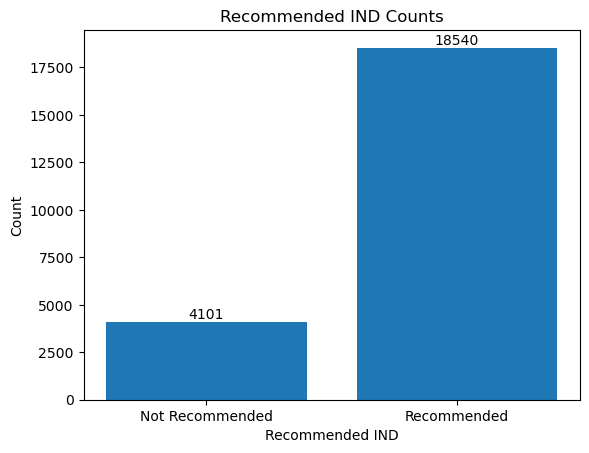

In [28]:
recommend_counts = data_df['Recommended IND'].value_counts()

bars = plt.bar(recommend_counts.index, recommend_counts.values)

plt.xlabel('Recommended IND')
plt.ylabel('Count')
plt.title('Recommended IND Counts')
plt.xticks(recommend_counts.index, labels=['Recommended', 'Not Recommended'])

plt.bar_label(bars)  

plt.show()

##### - Relationship between Rating and Recommended IND

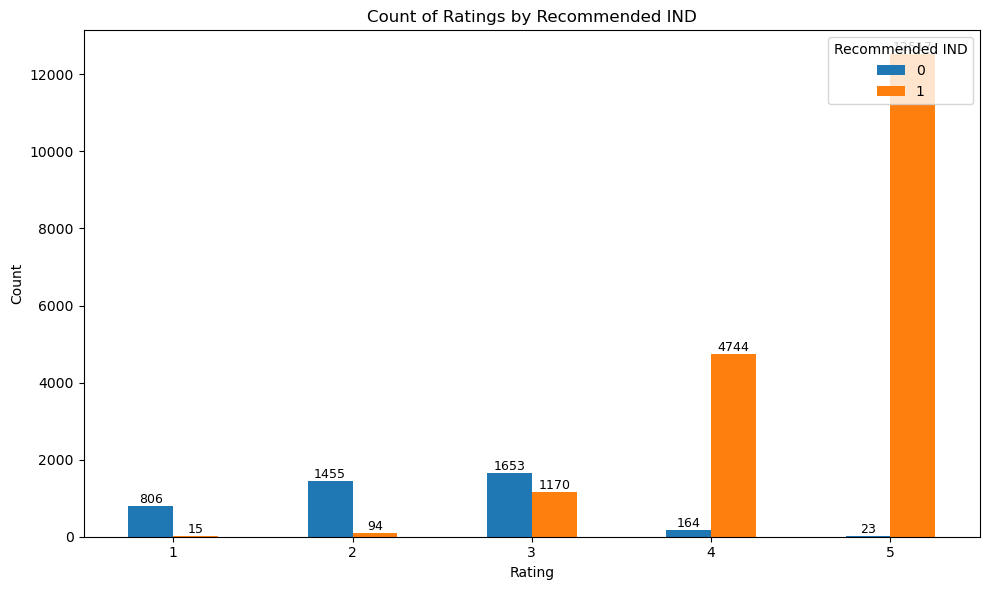

In [29]:
counts = data_df_pfs.groupby(['Rating', 'Recommended IND'])['Recommended IND'].count().unstack()

ax = counts.plot(kind='bar', figsize=(10, 6))
plt.title('Count of Ratings by Recommended IND')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Recommended IND', loc='upper right')
plt.xticks(rotation=0)

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9)

plt.tight_layout()
plt.show()

In [30]:
sample_texts = data_df_pfs[(data_df_pfs['Recommended IND'] == 0) & (data_df_pfs['Rating'] == 5)]['Combined Text'].tolist()

for text in sample_texts[:5]:
    print(text)
    print()

cute shirt, but not for me the blue lace with the white top underneath is very pretty. unfortunately i did not like how billowy it was below the bra line.

love this top! this top is one of my retailer faves! it is so comfortable and love the quality and design. i receive many compliments on this top. i usually wear an xs or s in retailer tops and the xs was a little tight in the arms. the dressing room attendant suggested ordering a petite small so i wouldn't lose the shape. so glad i did. it fits perfect! i even ordered when it was on sale!! the gray color is perfect! its not too thick or thin.

love this dress i also have this dress in 3/4 sleeve, tegan tunic. i love this dress. it can be dressed up or down.

too small and short for my age. very pretty but too short for my age. looks well made and green dress is beautiful. it was just too short for me to be comfortable wearing.

stunning this jumpsuit runs large so i sized down perfectly one full size down. i have a size b chest and

In [31]:
sample_texts = data_df_pfs[(data_df_pfs['Recommended IND'] == 1) & (data_df_pfs['Rating'] == 1)]['Combined Text'].tolist()

for text in sample_texts[:5]:
    print(text)
    print()

  beautiful jacket and i got lots of compliments. true to size. it's not thick but it's very warm.

  very cute top. i went down a size because for me it was a little large in the back, but that was just my taste. i purchased the denim print.

great t i love this t-shirt because it has the combination of elegance and relazation to a "t".
it's soft, pretty and covers my wide bottom well.

traditional material in a new way love the movement of the blouse and how it falls. great quality material.

odd neckline i loved the color and design until i tried it on in the store. i am 5'5" with a slender build. i tried my usual xs but couldn't manage to put this shirt on me without risking smear my makeup or scratch my face by the elastic band at the neckline. the band is so small even fully stretched out. i have a normal sized head just in case you wonder... i gave up after wrestling with it. i can only imagine how uncomfortable to wear something with a tight elastic band choking me...funny... b

##### - Word Frequencies Analysis

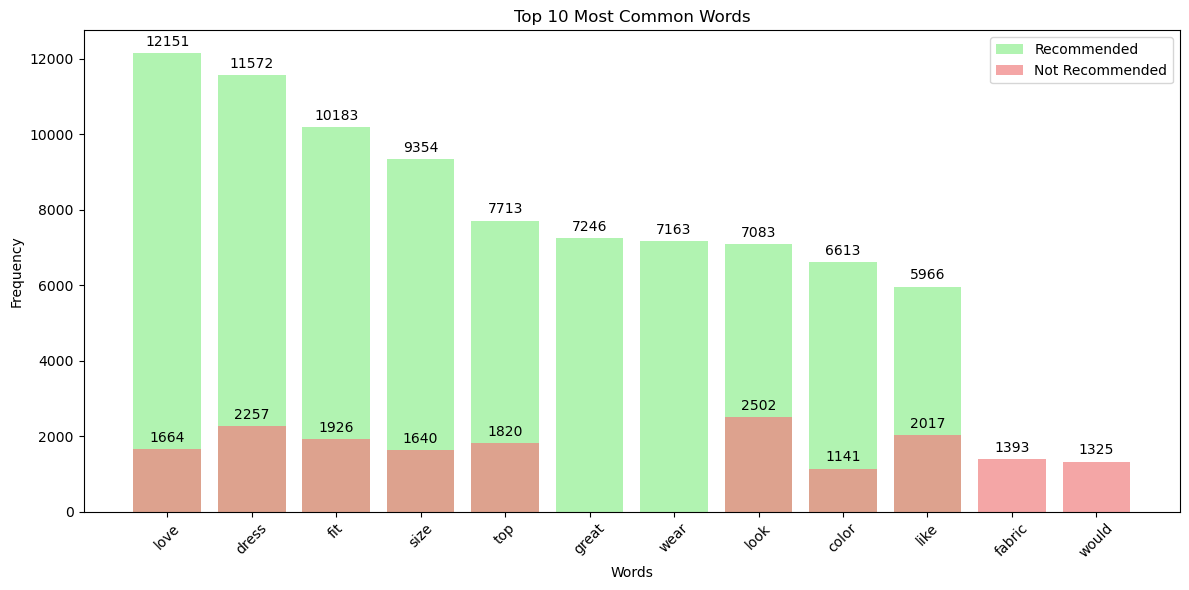

In [32]:
# Combine tokenized text for both recommended and non-recommended reviews into single lists
recommended_tokens = [word for sublist in data_df_pfs[data_df_pfs['Recommended IND'] == 1]['Tokenized Text'] for word in sublist]
not_recommended_tokens = [word for sublist in data_df_pfs[data_df_pfs['Recommended IND'] == 0]['Tokenized Text'] for word in sublist]

# Get the top 10 most common words and their counts for recommended and not recommended reviews
top_10_recommended_words = Counter(recommended_tokens).most_common(10)
top_10_not_recommended_words = Counter(not_recommended_tokens).most_common(10)

# Extract words and counts for plotting
recommended_words, recommended_counts = zip(*top_10_recommended_words)
not_recommended_words, not_recommended_counts = zip(*top_10_not_recommended_words)

# Create a bar plot for the top 10 most common words for both recommended and not recommended reviews
plt.figure(figsize=(12, 6))

bars1 = plt.bar(recommended_words, recommended_counts, label='Recommended', color='lightgreen', alpha=0.7)
bars2 = plt.bar(not_recommended_words, not_recommended_counts, label='Not Recommended', color='lightcoral', alpha=0.7)

plt.bar_label(bars1, labels=recommended_counts, label_type='edge', padding=3)
plt.bar_label(bars2, labels=not_recommended_counts, label_type='edge', padding=3)

plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### - Word Cloud

In [33]:
recommended_list = list(recommended_words)

elements_to_remove = ['great', 'wear']
for element in elements_to_remove:
    if element in recommended_list:
        recommended_list.remove(element)
        
print(recommended_list)

['love', 'dress', 'fit', 'size', 'top', 'look', 'color', 'like']


In [34]:
not_recommended_list = list(not_recommended_words)

elements_to_remove = ['fabric','would']
for element in elements_to_remove:
    if element in not_recommended_list:
        not_recommended_list.remove(element)
        
print(not_recommended_list)

['look', 'dress', 'like', 'fit', 'top', 'love', 'size', 'color']


In [35]:
words_to_exclude = []

for element in recommended_list:
    if element not in words_to_exclude:
        words_to_exclude.append(element)
        
for element in not_recommended_list:
    if element not in words_to_exclude:
        words_to_exclude.append(element)
        
print(words_to_exclude)

['love', 'dress', 'fit', 'size', 'top', 'look', 'color', 'like']


In [36]:
def filter_tokens(tokens):
    return [token for token in tokens if token.lower() not in words_to_exclude]

data_df_pfs['Filtered Tokens'] = data_df_pfs['Tokenized Text'].apply(filter_tokens)

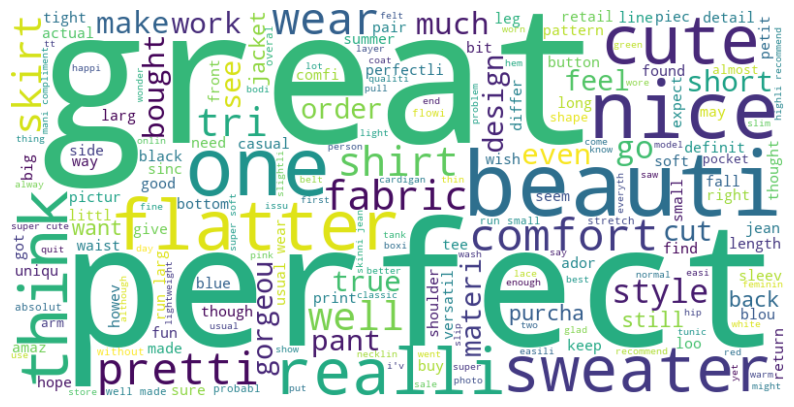

In [37]:
# Flatten the lists of tokens into a single list
recommended_tokens = [token for sublist in data_df_pfs[data_df_pfs['Recommended IND'] == 1]['Filtered Tokens'] for token in sublist]

# Convert the tokens to strings and join them into a single string
recommended_tokens_strings = ' '.join(map(str, recommended_tokens))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(recommended_tokens_strings)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


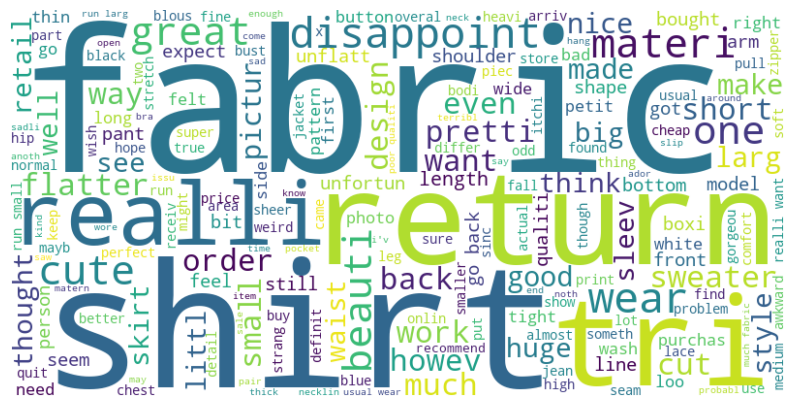

In [38]:
not_recommended_tokens = [token for sublist in data_df_pfs[data_df_pfs['Recommended IND'] == 0]['Filtered Tokens'] for token in sublist]

not_recommended_tokens_strings = ' '.join(map(str, not_recommended_tokens))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(not_recommended_tokens_strings)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


##### - Text Length Analysis

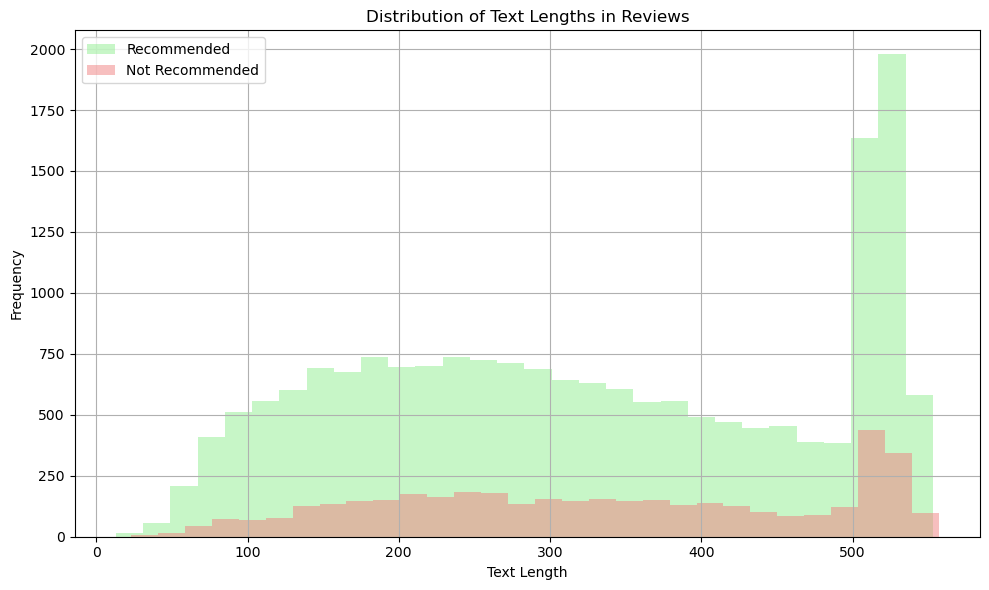

In [39]:
data_df_pfs['Text Length'] = data_df_pfs['Combined Text'].apply(len)  # Use 'Combined Text' or 'Tokenized Text' as needed

# Separate text lengths based on 'Recommended IND'
recommended_lengths = data_df_pfs[data_df_pfs['Recommended IND'] == 1]['Text Length']
not_recommended_lengths = data_df_pfs[data_df_pfs['Recommended IND'] == 0]['Text Length']

# Plotting histograms to visualize text length distribution
plt.figure(figsize=(10, 6))

plt.hist(recommended_lengths, bins=30, alpha=0.5, label='Recommended', color='lightgreen')
plt.hist(not_recommended_lengths, bins=30, alpha=0.5, label='Not Recommended', color='lightcoral')

plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths in Reviews')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##### - Sentiment Analysis

In [40]:
nltk.download('vader_lexicon')

# Initializing SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Function to get sentiment polarity score
def get_sentiment_score(text):
    return sid.polarity_scores(text)['compound']

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [41]:
# Apply sentiment analysis to each review
data_df_pfs['Sentiment Score'] = data_df_pfs['Combined Text'].apply(get_sentiment_score)

data_df_pfs.head(3)

,Combined Text,Tokenized Text,Rating,Recommended IND,Filtered Tokens,Text Length,Sentiment Score
0,absolutely wonderful - silky and sexy and co...,"[absolut, wonder, silki, sexi, comfort]",4,1,"[absolut, wonder, silki, sexi, comfort]",55,0.8932
1,love this dress! it's sooo pretty. i happe...,"[love, dress, sooo, pretti, happen, find, stor...",5,1,"[sooo, pretti, happen, find, store, i'm, glad,...",305,0.9729
2,some major design flaws i had such high hopes ...,"[major, design, flaw, high, hope, dress, reall...",3,0,"[major, design, flaw, high, hope, realli, want...",524,0.9427


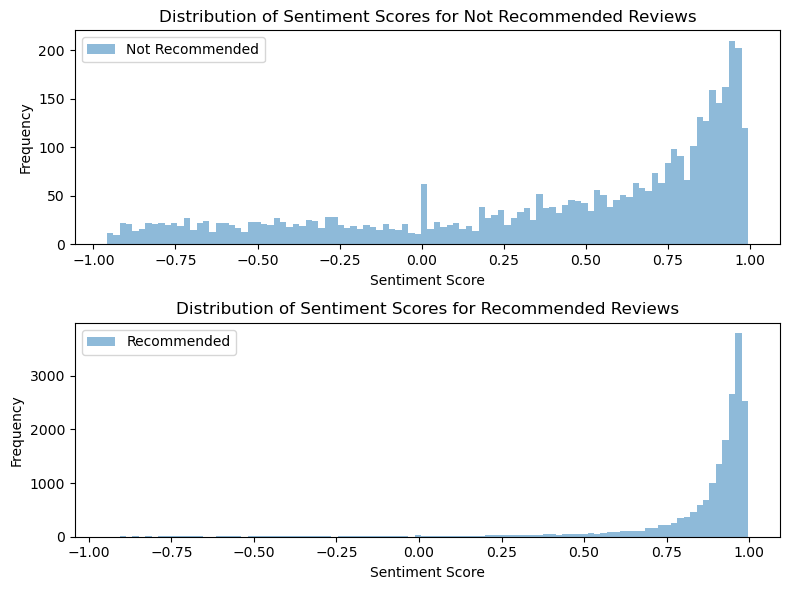

In [42]:
# Create subplots with two rows and one column
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))

# Plot histogram for non-recommended reviews
data_df_pfs[data_df_pfs['Recommended IND'] == 0]['Sentiment Score'].plot(kind='hist', bins=100, alpha=0.5, label='Not Recommended', ax=ax1)
ax1.set_title('Distribution of Sentiment Scores for Not Recommended Reviews')
ax1.set_xlabel('Sentiment Score')
ax1.set_ylabel('Frequency')
ax1.legend()

# Plot histogram for recommended reviews
data_df_pfs[data_df_pfs['Recommended IND'] == 1]['Sentiment Score'].plot(kind='hist', bins=100, alpha=0.5, label='Recommended', ax=ax2)
ax2.set_title('Distribution of Sentiment Scores for Recommended Reviews')
ax2.set_xlabel('Sentiment Score')
ax2.set_ylabel('Frequency')
ax2.legend()

# Adjust layout
plt.tight_layout()
plt.show()

In [43]:
print('Not Recommended Reviews with high positive sentiment scores\n')

# Filter the dataset for not recommended reviews with higher positive sentiment scores
high_positive_not_recommended = data_df_pfs[(data_df_pfs['Recommended IND'] == 0) & (data_df_pfs['Sentiment Score'] > 0.5)]

# Display sample reviews
for index, row in high_positive_not_recommended.head(5).iterrows():  # Display 5 sample reviews
    print(f"Sentiment Score: {row['Sentiment Score']}")
    print(f"Review Text: {row['Combined Text']}\n")  # Assuming 'Combined Text' contains the review text


Not Recommended Reviews with high positive sentiment scores

Sentiment Score: 0.9427
Review Text: some major design flaws i had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c

Sentiment Score: 0.947
Review Text: not for the very petite i love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and 

## 6. Post-feature Selection

In [44]:
columns_to_drop = ['Combined Text','Tokenized Text','Rating','Text Length','Sentiment Score']

data_df_pfs.drop(columns=columns_to_drop, inplace=True)

In [45]:
data_df_pfs.head(3)

,Recommended IND,Filtered Tokens
0,1,"[absolut, wonder, silki, sexi, comfort]"
1,1,"[sooo, pretti, happen, find, store, i'm, glad,..."
2,0,"[major, design, flaw, high, hope, realli, want..."


In [46]:
data_df_pfs['Text String'] = data_df_pfs['Filtered Tokens'].apply(lambda x: ' '.join(x))

data_df_pfs.drop(columns=['Filtered Tokens'], inplace=True)

data_df_pfs.head(3)

,Recommended IND,Text String
0,1,absolut wonder silki sexi comfort
1,1,sooo pretti happen find store i'm glad bc neve...
2,0,major design flaw high hope realli want work i...


## 7. TF-IDF

In [47]:
tfidf_vectorizer = TfidfVectorizer()
vectorized_text = tfidf_vectorizer.fit_transform(data_df_pfs['Text String'])

In [48]:
vectorized_text_df = vectorized_text.toarray()
vectorized_text_df = pd.DataFrame(vectorized_text_df)
print(vectorized_text_df.shape)
vectorized_text_df.head()

(22641, 10590)


,0,1,2,3,4,5,6,7,8,9,...,10580,10581,10582,10583,10584,10585,10586,10587,10588,10589
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 8. Re-sampling

In [49]:
target_var = data_df_pfs['Recommended IND']
target_var.value_counts()

Recommended IND
1    18540
0     4101
Name: count, dtype: int64

In [50]:
# Set the desired number of samples for each class
target_count = 5000

# Create an instance of RandomUnderSampler
under_sampler = RandomUnderSampler(sampling_strategy={1:5000}, random_state=42)
over_sampler = SMOTE(sampling_strategy={0:5000}, random_state=42)

# Resample the data
X_under_resampled, y_under_resampled = under_sampler.fit_resample(vectorized_text, target_var)
X_resampled, y_resampled = over_sampler.fit_resample(X_under_resampled, y_under_resampled)

In [51]:
y_resampled.value_counts()

Recommended IND
0    5000
1    5000
Name: count, dtype: int64

In [52]:
X_resampled_df = X_resampled.toarray()
X_resampled_df = pd.DataFrame(X_resampled_df)
X_resampled_df

,0,1,2,3,4,5,6,7,8,9,...,10580,10581,10582,10583,10584,10585,10586,10587,10588,10589
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
y_resampled

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Recommended IND, Length: 10000, dtype: int64

In [54]:
df_all = pd.merge(y_resampled,X_resampled_df,left_index=True, right_index=True)
df_all

,Recommended IND,0,1,2,3,4,5,6,7,8,...,10580,10581,10582,10583,10584,10585,10586,10587,10588,10589
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 9. Data Splitting

In [55]:
X = df_all.drop('Recommended IND',axis=1)

y = df_all['Recommended IND']

#split into train: test = 4: 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#The stratify=y parameter ensures that the class proportions are preserved in both the training and testing sets, 
# helping to mitigate potential issues caused by class imbalances

In [56]:
y_train

2858    0
5943    1
3905    0
6785    1
1564    0
       ..
9088    1
1717    0
7896    1
3691    0
131     0
Name: Recommended IND, Length: 8000, dtype: int64

In [57]:
y_test

2919    0
5012    1
1631    0
8637    1
3486    0
       ..
4699    1
3354    0
8845    1
8667    1
6414    1
Name: Recommended IND, Length: 2000, dtype: int64

## 10. Model Building 

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

## 10.1 Random Forest

In [59]:
#building a random forest text classification model
rf_model = RandomForestClassifier()  

#trained on train data 
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [60]:
#predict unseen data 
y_pred = rf_model.predict(X_test)

In [61]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Precision, Recall, F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.86
Precision: 0.88
Recall: 0.83
F1-score: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1000
           1       0.88      0.83      0.85      1000

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000



Confusion Matrix:
 [[882 118]
 [169 831]]


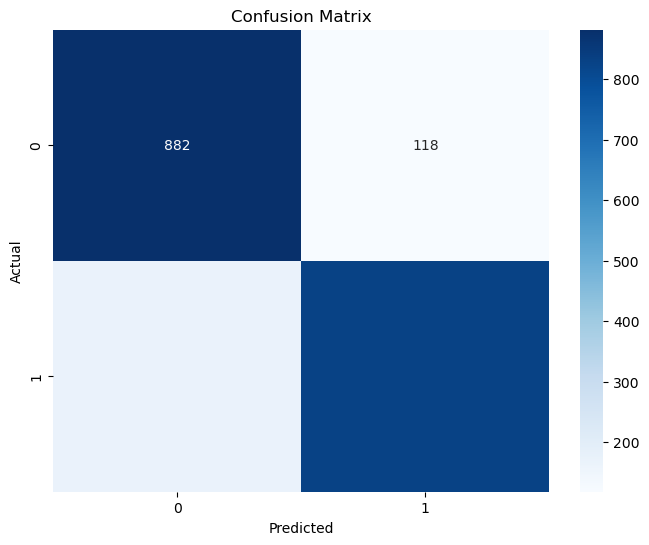

In [66]:
#creating confusion matrix evaluation
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:\n", cm)

# Plotting confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [67]:
all_hyperparameters = rf_model.get_params()
for param, value in all_hyperparameters.items():
    print(f"{param}: {value}")

bootstrap: True
ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: None
max_features: sqrt
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
monotonic_cst: None
n_estimators: 100
n_jobs: None
oob_score: False
random_state: None
verbose: 0
warm_start: False


In [72]:
# Define the hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['sqrt', 'log2'], 
    'criterion': ['gini', 'entropy'],  
    'bootstrap': [True, False] 
}

random_search_rf = RandomizedSearchCV(
    rf_model,
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings that are sampled
    cv=5,  # Cross-validation folds
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available processors
)

random_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, verbose=2)

In [73]:
# Get the best parameters and best score
best_params = random_search_rf.best_params_

print(best_params)

{'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'criterion': 'entropy', 'bootstrap': False}


In [74]:
best_rf_model = RandomForestClassifier(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy',
                       max_features='log2', min_samples_split=10,
                       n_estimators=200, random_state=42)

In [75]:
y_pred_new = best_rf_model.predict(X_test)

In [76]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred_new)
print(f"Accuracy: {accuracy:.2f}")

# Precision, Recall, F1-score
precision = precision_score(y_test, y_pred_new)
recall = recall_score(y_test, y_pred_new)
f1 = f1_score(y_test, y_pred_new)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_new))

Accuracy: 0.87
Precision: 0.89
Recall: 0.85
F1-score: 0.87
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1000
           1       0.89      0.85      0.87      1000

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000



Confusion Matrix:
 [[893 107]
 [145 855]]


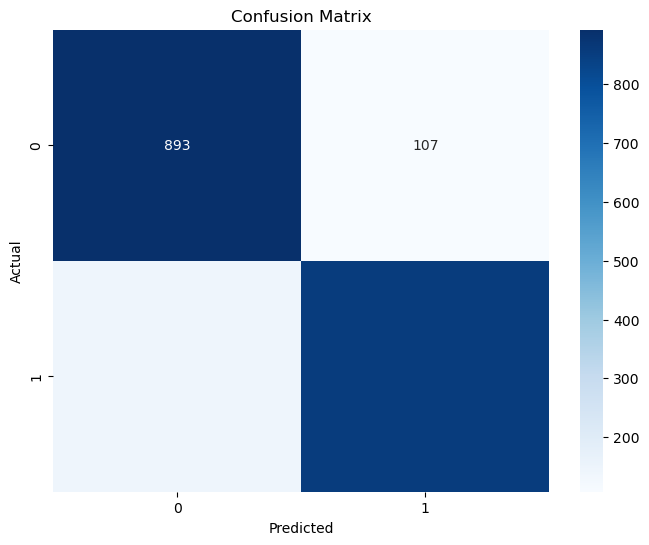

In [77]:
cm = confusion_matrix(y_test, y_pred_new)

print("Confusion Matrix:\n", cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 10.2 - Multinomial Naive Bayes

In [74]:
from sklearn.naive_bayes import BernoulliNB

In [79]:
bnb = BernoulliNB(alpha = 2)
bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)

In [79]:
from sklearn.naive_bayes import MultinomialNB

In [80]:
mnb = MultinomialNB()

# Train the model
mnb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = mnb.predict(X_test)

Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1000
           1       0.89      0.84      0.86      1000

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000

Confusion Matrix:
 [[900 100]
 [163 837]]


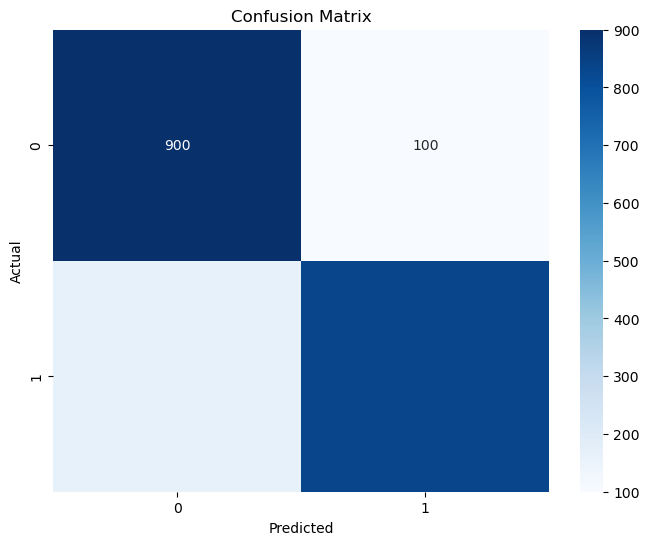

In [81]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:\n", cm)

# Plotting confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [82]:
all_hyperparameters = mnb.get_params()
for param, value in all_hyperparameters.items():
    print(f"{param}: {value}")

alpha: 1.0
class_prior: None
fit_prior: True
force_alpha: True


Best Parameters: {'alpha': 1.0}

Accuracy: 0.8685

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1000
           1       0.89      0.84      0.86      1000

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000

Confusion Matrix:
 [[900 100]
 [163 837]]


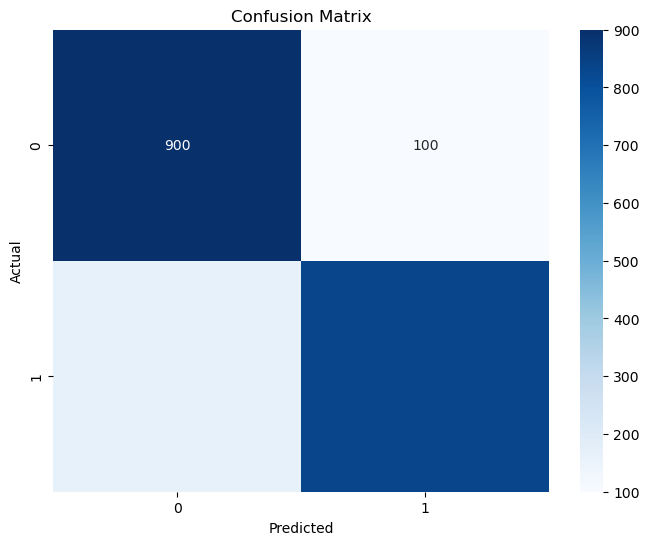

In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

param = {'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]}
# Create GridSearchCV object
model_tune = GridSearchCV(mnb, param, scoring='accuracy', cv=5)

# Fit the model
model_tune.fit(X_train, y_train)

# Get best parameters
print("Best Parameters:", model_tune.best_params_)

# Evaluate the best model
best_model = model_tune.best_estimator_
best_pred = best_model.predict(X_test)

print("\nAccuracy:", metrics.accuracy_score(y_test, best_pred))
print('\nClassification Report:')
print(classification_report(y_test, best_pred))

cm = confusion_matrix(y_test, best_pred)

print("Confusion Matrix:\n", cm)

# Plotting confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 10.3 Logistic Rgression

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1000
           1       0.88      0.85      0.86      1000

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000

Confusion Matrix:
 [[884 116]
 [150 850]]


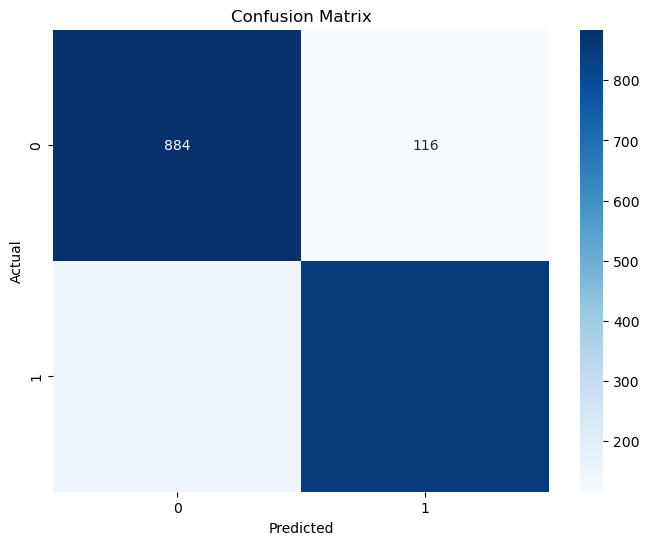

In [86]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:\n", cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [87]:
all_hyperparameters = log_reg.get_params()
for param, value in all_hyperparameters.items():
    print(f"{param}: {value}")

C: 1.0
class_weight: None
dual: False
fit_intercept: True
intercept_scaling: 1
l1_ratio: None
max_iter: 100
multi_class: auto
n_jobs: None
penalty: l2
random_state: None
solver: lbfgs
tol: 0.0001
verbose: 0
warm_start: False


Best Parameters: {'logisticregression__C': 0.01, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}

Accuracy: 0.847

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1000
           1       0.87      0.82      0.84      1000

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000

Confusion Matrix:
 [[875 125]
 [181 819]]


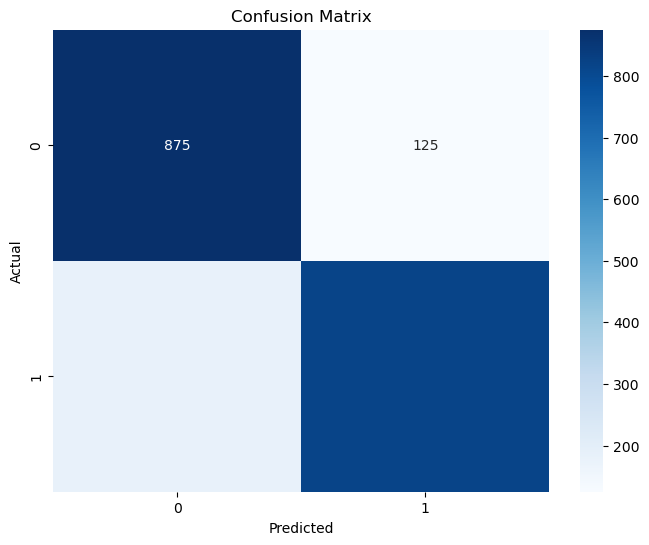

In [88]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Use pipeline to scale data and apply logistic regression
log_reg = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

param_grid = {'logisticregression__C': [0.01, 0.1, 1, 10, 100],
              'logisticregression__penalty': ['l2'],
              'logisticregression__solver': ['lbfgs', 'liblinear']}

# GridSearchCV for hyperparameter tuning
grid = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

best_log_reg = grid.best_estimator_
best_pred = best_log_reg.predict(X_test)
print("\nAccuracy:", accuracy_score(y_test, best_pred))
print('\nClassification Report:')
print(classification_report(y_test, best_pred))

cm = confusion_matrix(y_test, best_pred)

print("Confusion Matrix:\n", cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()